![Pokedex](https://cdn.bulbagarden.net/upload/4/4b/Pok%C3%A9dex_logo.png)

**Problem statement :**
You are going on a trip to Dudhsagar Falls, Goa. To reach the falls you have to cross a huge forest in Collem, so you thought of entering the forest. While you are on your route you spotted multiple Pokemons like Bulbasaur, Pikachu, and Charmender. After coming back, you thought of making a PokeDex - a Pokemon Detector Device which classifies these Pokemons. Write an algorithm that classifies these PokeMon's. 

![Pokemon + Pokedex](https://3.bp.blogspot.com/-Oe6gslajqTY/W-1f0KVQmjI/AAAAAAAAANI/DrdQcH9i-5Yk3wjqaah8MmSQh_Hm-C_VACHMYCw/s1600/pokemon-go-is-going-to-sell-locations-to-brands.jpg)

**About Dataset :**
There are two folders Test and Train.

**Train :**
The train folder consists of a folder named Images which contains the images of three types of pokemon and a csv file which maps the images in the image folder to the name of that pokemon, The csv contains the field ImageId which is nothing but unique name given to each image and other field is NameOfPokemon which gives the pokemon name associated with that image.

**Test :**
Test also contains an image folder on which your model will be tested on and also there is a test csv file which only contains the name or ImageId of the image and gives the order in which each image is to be labelled .

**Submission :**
This file will be a csv file that will be submitted by you it will contain the same fields as that of sample submission the order of the ImageId should match that of sample submission or test csv.

**The three categories of Pokemon to be classified are Pikachu,Bulbasaur and Charmander.**

## 1. Importing the libraries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from keras.preprocessing import image
from matplotlib import pyplot as plt

import os
from pathlib import Path

print('Done !')

Using TensorFlow backend.


Done !


## 2. Data Preparation

### Training Data

#### 2A. Reading the train.csv 

In [2]:
train_data = pd.read_csv('train.csv')

train_data.sample(5)

,ImageId,NameOfPokemon
234,551.jpg,Charmander
101,397.jpg,Bulbasaur
36,332.jpg,Pikachu
158,454.jpg,Bulbasaur
285,602.jpg,Charmander


#### 2B. Reading the training images and prepairing a dataset with images (matrix) and correct labels

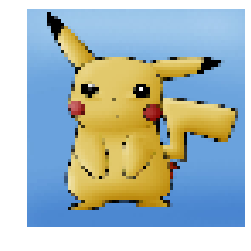

In [3]:
img1 = image.load_img('./Train/296.jpg', target_size = (64,64))

plt.imshow(img1)
plt.axis('off')
plt.show()

In [4]:
p = Path('./Train/')

imgs = p.glob('*.jpg')

img_data = []
img_label = []

for img_path in imgs:
    
    # Getting the label
    label_num = str(img_path).split('/')[1]
    index = train_data[train_data['ImageId'] == label_num].index.values.astype(int)[0]
    label_name = train_data[train_data['ImageId'] == label_num].NameOfPokemon[index]
    img_label.append(label_name)
    
    # Getting img data
    img = image.load_img(img_path, target_size = (64, 64))
    img = image.img_to_array(img)
    img = img / 255.0
    img_data.append(img)

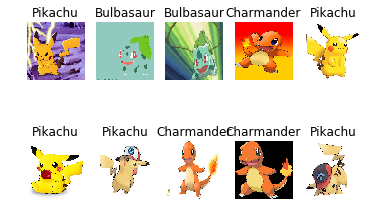

In [8]:
for i in range(10):
    plt.subplot(2,5,i + 1)
    plt.imshow(img_data[i])
    plt.title(img_label[i])
    plt.axis('off')
plt.show()

#### 2C. Reshaping Data & Label Encoding on target col (img_label)

In [9]:
img_data = np.array(img_data)
img_label = np.array(img_label)

In [10]:
img_data = img_data.reshape((img_data.shape[0], -1))

In [11]:
img_data.shape

(304, 12288)

In [12]:
label_dictionary = {
    'Pikachu' : 0,
    'Charmander' : 1,
    'Bulbasaur' : 2,
}

labels_encoded = [label_dictionary[label] for label in img_label]

print(labels_encoded[:10])

[0, 2, 2, 1, 0, 0, 0, 1, 1, 0]


### Test Data

In [13]:
p = Path('./Test/')

imgs = p.glob('*.jpg')

img_test_data = []
imgId = []

for img_path in imgs:
    # Getting the label
    label_num = str(img_path).split('/')[1]
    imgId.append(label_num)
    
    # Getting img data
    img = image.load_img(img_path, target_size = (64, 64))
    img = image.img_to_array(img)
    img = img / 255.0
    img_test_data.append(img)
    
img_test_data = np.array(img_test_data)
img_test_data = img_test_data.reshape((img_test_data.shape[0], -1))

## 3. Creating Machine Learning Model

### 3A Support Vector Machine (Without Hyperparamter tuning)

In [14]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(img_data, labels_encoded)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [15]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(svc, img_data, labels_encoded, cv=5).mean()
score

0.7540489201144939

### 3B Hyperparameter tuning using GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'C': [1, 10, 20 ,30 ,50, 100], 'kernel': ['linear']},
    {'C': [1, 10, 20 ,30 ,50, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
    {'C': [1, 10, 20 ,30 ,50, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['poly']},
    {'C': [1, 10, 20 ,30 ,50, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['sigmoid']},
    # {'C': [1, 10, 20 ,30 ,50, 100, 500,1000], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'kernel': ['precomputed']},
]

gs = GridSearchCV(estimator = svc, 
                  param_grid = param_grid,
                  cv=5,
                  scoring = 'accuracy',
                  n_jobs = -1)

In [17]:
gs.fit(img_data, labels_encoded)

/home/avi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [1, 10, 20, 30, 50, 100], 'kernel': ['linear']},
                         {'C': [1, 10, 20, 30, 50, 100],
                          'gamma': [0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 20, 30, 50, 100],
                          'gamma': [0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['poly']},
                         {'C': [1, 10, 20, 30, 50, 100],
                          'gamma': [0.1, 0.01, 0.001, 0.0001],
                 

In [18]:
gs.best_estimator_

SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
gs.best_params_

{'C': 30, 'gamma': 0.0001, 'kernel': 'rbf'}

In [20]:
accuracy = gs.best_score_
accuracy

0.9210526315789473

In [21]:
svc = SVC(kernel = 'rbf', C = 30, gamma = 0.0001)

svc.fit(img_data, labels_encoded)

SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Making prediction on test data

In [22]:
y_pred = svc.predict(img_test_data)
y_pred

array([0, 2, 2, 0, 2, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 0, 1, 2, 0, 2,
       2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1,
       1, 0, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0,
       2, 2, 0, 0, 1, 2, 1, 0, 1, 1, 2, 0, 2, 2, 0, 1, 1, 1, 0, 2, 1, 2,
       0, 1, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0])

In [23]:
decoding_ypred = {
    0 : 'Pikachu',
    1 : 'Charmander',
    2 : 'Bulbasaur'
}

y_pred = [decoding_ypred[y] for y in y_pred]

### Converting it to a data frame

In [24]:
df = pd.DataFrame({
    'ImageId' : imgId,
    'NameOfPokemon' : y_pred,
})

df.set_index('ImageId', inplace = True)

#### Sample submission file

In [26]:
sample_submission = pd.read_csv('Sample_submission.csv')

sample_submission.head(3)

,ImageId,NameOfPokemon
0,1106.jpg,Pikachu
1,2236.jpg,Pikachu
2,1131.jpg,Pikachu


#### Reordering my df according to sample submission file

In [27]:
new_index = sample_submission.ImageId

In [29]:
df = df.reindex(new_index)

df.head(3)

,NameOfPokemon
ImageId,
1106.jpg,Bulbasaur
2236.jpg,Charmander
1131.jpg,Bulbasaur


#### Again making ImageId as a col

In [31]:
df.reset_index(inplace = True)

df.head(3)

,ImageId,NameOfPokemon
0,1106.jpg,Bulbasaur
1,2236.jpg,Charmander
2,1131.jpg,Bulbasaur


#### Saving solution to a csv file

In [32]:
df.to_csv('PokemonPrediction.csv', index = False)

___

### On Submission the score on test images was 96%